In [27]:

import numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from keras import layers, models, callbacks, datasets, utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

(x_tr_all, y_tr_all), (x_te, y_te) = datasets.cifar10.load_data()
x_tr_all, y_tr_all = x_tr_all[:4000]/255., y_tr_all[:4000].flatten()
x_te, y_te         = x_te[:2000]/255.,  y_te[:2000].flatten()

x_tr, x_val, y_tr, y_val = train_test_split(
    x_tr_all, y_tr_all, test_size=0.2, stratify=y_tr_all, random_state=0)

num_classes = 10
ytr_cat  = utils.to_categorical(y_tr , num_classes)
yval_cat = utils.to_categorical(y_val, num_classes)
yte_cat  = utils.to_categorical(y_te , num_classes)

model = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(32,32,3)),

    layers.Conv2D(32, 3, padding="same", use_bias=False),
    layers.BatchNormalization(), layers.Activation("relu"),
    layers.Conv2D(32, 3, padding="same", use_bias=False),
    layers.BatchNormalization(), layers.Activation("relu"),
    layers.MaxPooling2D(), layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(), layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(), layers.Activation("relu"),
    layers.MaxPooling2D(), layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(
    x_tr, ytr_cat,
    validation_data=(x_val, yval_cat),
    epochs=50,
    batch_size=64,
    callbacks=[
        callbacks.EarlyStopping(patience=6, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
    ],
    verbose=2)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 - 4s - 89ms/step - accuracy: 0.1294 - loss: 2.6423 - val_accuracy: 0.1325 - val_loss: 2.2857 - learning_rate: 0.0010
Epoch 2/50
50/50 - 3s - 63ms/step - accuracy: 0.1697 - loss: 2.1717 - val_accuracy: 0.1050 - val_loss: 2.3531 - learning_rate: 0.0010
Epoch 3/50
50/50 - 3s - 63ms/step - accuracy: 0.2081 - loss: 2.0716 - val_accuracy: 0.1225 - val_loss: 2.3173 - learning_rate: 0.0010
Epoch 4/50
50/50 - 3s - 62ms/step - accuracy: 0.2209 - loss: 2.0310 - val_accuracy: 0.1363 - val_loss: 2.5346 - learning_rate: 0.0010
Epoch 5/50
50/50 - 3s - 62ms/step - accuracy: 0.2212 - loss: 1.9584 - val_accuracy: 0.1450 - val_loss: 2.3765 - learning_rate: 5.0000e-04
Epoch 6/50
50/50 - 3s - 61ms/step - accuracy: 0.2328 - loss: 1.9382 - val_accuracy: 0.1275 - val_loss: 2.2580 - learning_rate: 5.0000e-04
Epoch 7/50
50/50 - 3s - 63ms/step - accuracy: 0.2416 - loss: 1.9240 - val_accuracy: 0.1538 - val_loss: 2.3390 - learning_rate: 5.0000e-04
Epoch 8/50
50/50 - 3s - 63ms/step - accuracy: 0.2300 - loss: 


Test loss  = 1.3955
Test accuracy ≈ 0.459


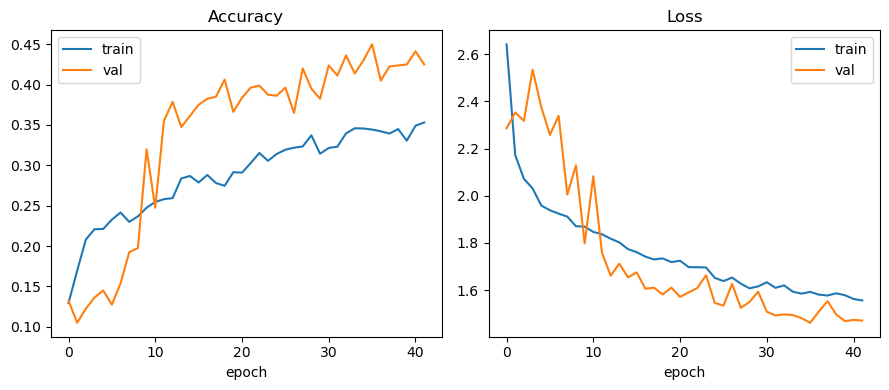

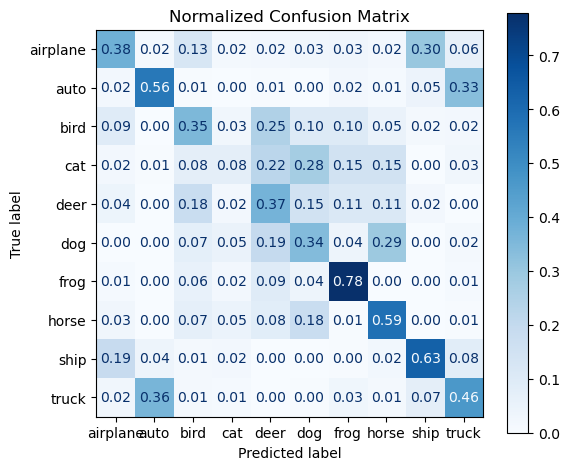

              precision    recall  f1-score   support

    airplane       0.46      0.38      0.42       196
        auto       0.56      0.56      0.56       198
        bird       0.36      0.35      0.36       195
         cat       0.27      0.08      0.12       199
        deer       0.30      0.37      0.33       198
         dog       0.29      0.34      0.32       185
        frog       0.64      0.78      0.70       216
       horse       0.47      0.59      0.52       193
        ship       0.60      0.63      0.62       217
       truck       0.46      0.46      0.46       203

    accuracy                           0.46      2000
   macro avg       0.44      0.45      0.44      2000
weighted avg       0.45      0.46      0.44      2000



In [ ]:
te_loss, te_acc = model.evaluate(x_te, yte_cat, verbose=0)
print(f"\nTest loss  = {te_loss:.4f}")
print(f"Test accuracy ≈ {te_acc:.3f}")

y_pred = model.predict(x_te, verbose=0).argmax(1)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## 5.1 learning curves
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(hist.history["accuracy"],     label="train")
ax[0].plot(hist.history["val_accuracy"], label="val")
ax[0].set_title("Accuracy"); ax[0].set_xlabel("epoch")
ax[0].legend()

ax[1].plot(hist.history["loss"],     label="train")
ax[1].plot(hist.history["val_loss"], label="val")
ax[1].set_title("Loss"); ax[1].set_xlabel("epoch")
ax[1].legend()

fig.tight_layout(); plt.show()

cm = confusion_matrix(y_te, y_pred, normalize="true")  # rows sum to 1
labels = ["airplane","auto","bird","cat","deer",
          "dog","frog","horse","ship","truck"]

fig_cm, ax_cm = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot(cmap="Blues", values_format=".2f", ax=ax_cm, colorbar=True)
ax_cm.set_title("Normalized Confusion Matrix")
plt.tight_layout(); plt.show()

print(classification_report(y_te, y_pred, target_names=labels))
